Coeficiente de la silueta --- 4:24 min
===

* 4:24 min | Ultima modificación: Octubre 13, 2021 | [YouTube](https://youtu.be/NJSYZPmIgyA)

Este es un coeficiente que mide la calidad del agrupamiento, en el que valores más altos indican clusters mejor definidos. Su cálculo se realiza usando dos métricas:

* $a$: El promedio de la distancia entre una muestra y todos los demás puntos que pertenecen a la misma clase.


* $b$: La distancia entre la muestra y todos los puntos del siguiente cluster más cercano.

La métrica se calcula como:

$$
s= \frac{b-a}{\max(a, b)}
$$

y toma valores entre -1 y +1.

La interpretación es la siguiente:

* Valores cercanos a -1 indican un agrupamiento incorrecto.

* Valores cercanos a cero indican clusters traslapados

* Valores cercanos a +1 indican clusters altamente densos.

De esta forma, los valores del coeficiente son más altos cuando los clusters son densos y bien separados.

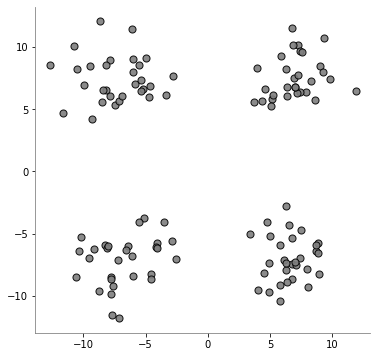

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=120,
    n_features=2,
    centers=[
        [7, 7],
        [-7, 7],
        [-7, -7],
        [7, -7],
    ],
    cluster_std=2.0,
    shuffle=False,
    random_state=5,
)

plt.figure(figsize=(6, 6))

plt.scatter(
    X[:, 0],
    X[:, 1],
    color="tab:gray",
    edgecolors="k",
    s=50,
    alpha=0.9,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.axis("equal")
plt.show()

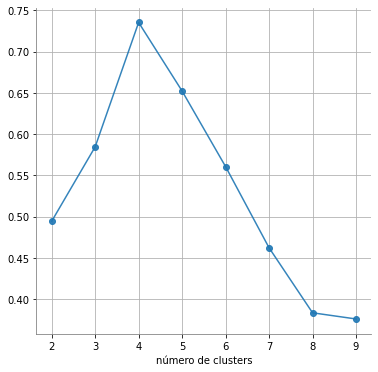

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

n_clusters = 10
scores = []

for n in range(2, n_clusters):
    
    kmeans = KMeans( n_clusters=n)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(silhouette_score(X, labels, metric="euclidean"))
    

plt.figure(figsize=(6,6))
plt.plot(range(2, n_clusters), scores, marker='o', color='tab:blue', alpha=0.9)
plt.xlabel('número de clusters')
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid()
plt.show()

In [3]:
scores

[0.49426439839274006,
 0.5845155570289335,
 0.735348568190471,
 0.652187884066843,
 0.5605539838381853,
 0.46212011770018885,
 0.38330359820881554,
 0.3758189628647399]